In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
from wordcloud import WordCloud
from collections import Counter

In [2]:
nltk.download('stopwords')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Konrad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\Konrad\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [3]:
# Loading collected data
tweets = pd.read_csv(f'./data/tweets.csv', parse_dates=['created_at'])
users = pd.read_csv(f'./data/users_clean.csv')

In [4]:
# Removing remaining duplicates from an original set
tweets = tweets.drop_duplicates(subset=['id'])

In [5]:
# Displaying first elements from a tweets set
tweets.head()

,hashtag,id,author_id,text,like_count,reply_count,retweet_count,quote_count,created_at,lang,mentions
0,#Qatar2022,1592601212511133696,3254197047,Uffà...ma quando finiscono i mondiali di #Qata...,0,0,0,0,2022-11-15 19:31:32+00:00,it,NaN
1,#Qatar2022,1592601205595070464,1441282471400673280,Η εντυπωσιακή σύμπτωση με τα «αστέρια» της Παρ...,0,0,0,0,2022-11-15 19:31:31+00:00,el,NaN
2,#Qatar2022,1592601170014412800,2901835883,#Qatar2022 | NKUNKU ENCIENDE LAS ALARMAS 🚨\n\n...,0,0,0,0,2022-11-15 19:31:22+00:00,es,NaN
3,#Qatar2022,1592601169922523136,1456620452261072896,"Ils étaient en 2018 en Russie, ils sont retenu...",0,0,0,0,2022-11-15 19:31:22+00:00,fr,NaN
4,#Qatar2022,1592601156412649477,968203797049769984,How to identify a whitexican in Qatar 2022 #Q...,0,1,0,0,2022-11-15 19:31:19+00:00,en,NaN


In [6]:
# Displaying descriptive statistics from a tweets set
tweets.describe()

,id,author_id,like_count,reply_count,retweet_count,quote_count
count,3.325880e+05,3.325880e+05,332588.000000,332588.000000,332588.000000,332588.000000
mean,1.598324e+18,8.074338e+17,6.627668,0.476187,1.068710,0.119256
std,2.810312e+15,6.879607e+17,281.980949,24.786027,32.465834,5.801430
min,1.592600e+18,5.770000e+02,0.000000,0.000000,0.000000,0.000000
25%,1.596361e+18,6.358913e+08,0.000000,0.000000,0.000000,0.000000
50%,1.597962e+18,1.031862e+18,0.000000,0.000000,0.000000,0.000000
75%,1.599085e+18,1.494021e+18,1.000000,0.000000,0.000000,0.000000
max,1.605586e+18,1.605579e+18,66210.000000,10775.000000,10591.000000,2185.000000


<AxesSubplot: >

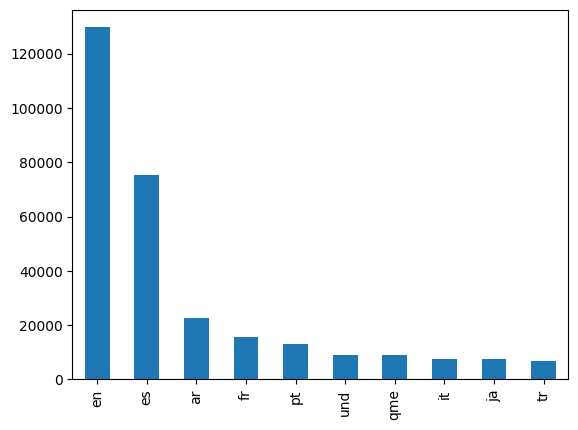

In [7]:
# Plotting the most frequent languages
tweets.lang.value_counts()[:10].plot(kind='bar')

<AxesSubplot: >

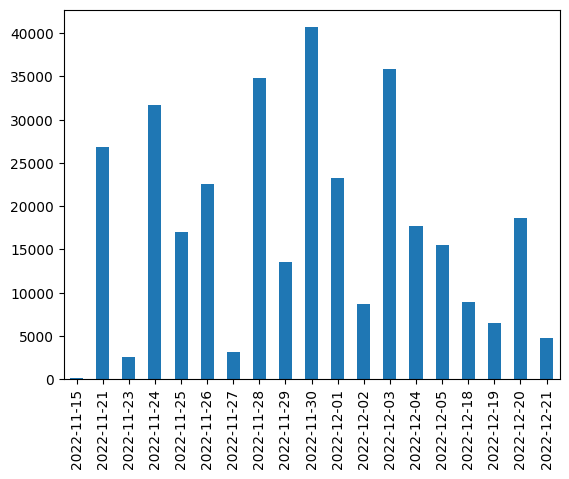

In [8]:
# Plotting the number of data collected per day
tweets.created_at.apply(lambda row : row.date()).sort_values().value_counts(sort=False).plot(kind='bar')

In [9]:
# Displaying first elements from a users set
users.head()

,id,username,created_at,followers_count,following_count,tweet_count,protected,verified
0,3254197047,PalloneBucato,2015-05-14 16:48:40+00:00,558,610,23651,False,False
1,1441282471400673280,BNsportsGr,2021-09-24 06:05:17+00:00,1260,142,19825,False,False
2,1591065849531604994,mistresslily85,2022-11-11 13:50:48+00:00,0,5,7,False,False
3,2901835883,lacasacatv,2014-12-02 04:01:41+00:00,1991,445,7163,False,False
4,1456620452261072896,XavBarretFoot,2021-11-05 13:54:59+00:00,631,205,624,False,False


In [10]:
# Displaying descriptive statistics from a users set
users.describe()

,id,followers_count,following_count,tweet_count
count,1.425070e+05,1.425070e+05,1.425070e+05,1.425070e+05
mean,7.036586e+17,1.037342e+05,1.454944e+03,2.338429e+04
std,6.790135e+17,1.415900e+06,1.128053e+04,7.910919e+04
min,8.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.047826e+08,6.200000e+01,1.050000e+02,5.520000e+02
50%,8.322165e+17,4.010000e+02,3.930000e+02,4.055000e+03
75%,1.408485e+18,2.627000e+03,1.122500e+03,1.816000e+04
max,1.605579e+18,1.332863e+08,2.291697e+06,7.866243e+06


In [11]:
# Obtaining the most mentioned users
mention_count = dict()

for mentions in tweets[tweets.mentions.notna()].mentions:
    for mention in pd.eval(mentions):
        if mention not in mention_count:
            mention_count[mention] = 0
        mention_count[mention] += 1

mention_count = {users[users.id == pd.eval(k)].username.item() : v for k, v in Counter(mention_count).most_common(10)}

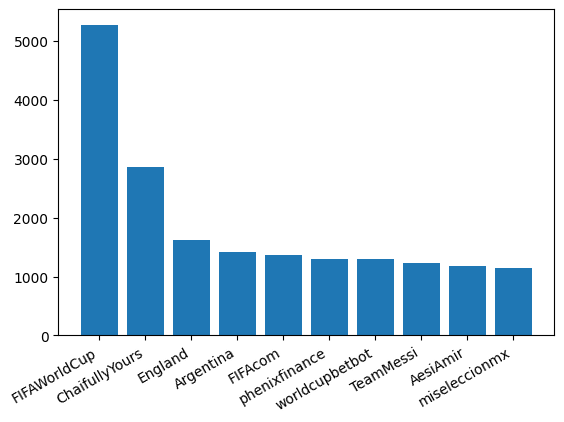

In [12]:
# Plotting the most mentioned users with corresponding mention counts
plt.bar(mention_count.keys(), mention_count.values())
plt.gcf().autofmt_xdate()

In [13]:
# Getting tweets created by the ChaifullyYours user
ChaifullyYours_id = users[users.username == 'ChaifullyYours'].id.values[0]
tweets[tweets.author_id == ChaifullyYours_id]

,hashtag,id,author_id,text,like_count,reply_count,retweet_count,quote_count,created_at,lang,mentions
26732,#QatarWorldCup2022,1594581374429794305,779652781397291009,#ContestAlert Guess the winner of the match an...,70,76,55,3,2022-11-21 06:40:00+00:00,en,['779652781397291009']
27340,#QatarWorldCup2022,1594577072835657728,779652781397291009,#ContestAlert Guess the winner of the match an...,76,75,60,4,2022-11-21 06:22:54+00:00,en,['779652781397291009']
100699,#QatarWorldCup2022,1595892514636140548,779652781397291009,#ContestAlert Guess the winner of the match an...,36,30,23,3,2022-11-24 21:30:00+00:00,en,['779652781397291009']
102710,#QatarWorldCup2022,1595877415577796608,779652781397291009,#ContestAlert Guess the winner of the match an...,48,42,34,5,2022-11-24 20:30:00+00:00,en,['779652781397291009']
106027,#QatarWorldCup2022,1595862317115314176,779652781397291009,#ContestAlert Guess the winner of the match an...,47,41,34,5,2022-11-24 19:30:00+00:00,en,['779652781397291009']
131270,#QatarWorldCup2022,1596254903835316224,779652781397291009,#ContestAlert Guess the winner of the match an...,51,55,37,6,2022-11-25 21:30:00+00:00,en,['779652781397291009']
132529,#QatarWorldCup2022,1596239804169084929,779652781397291009,#ContestAlert Guess the winner of the match an...,55,55,40,3,2022-11-25 20:30:00+00:00,en,['779652781397291009']
133799,#QatarWorldCup2022,1596224704846495744,779652781397291009,#ContestAlert Guess the winner of the match an...,50,46,34,4,2022-11-25 19:30:00+00:00,en,['779652781397291009']
144336,#QatarWorldCup2022,1596119010243919875,779652781397291009,#ContestAlert Guess the winner of the match an...,67,67,52,5,2022-11-25 12:30:01+00:00,en,['779652781397291009']
185826,#QatarWorldCup2022,1597327972993622016,779652781397291009,#ContestAlert Guess the winner of the match an...,0,0,0,0,2022-11-28 20:34:00+00:00,en,['779652781397291009']


In [14]:
# Obtaining users with a significant followers count and the verified status
users_fl = users[users.followers_count > 100]
users_vf = users[users.verified == True]

In [15]:
# Displaying the number of each particular users group
users_fl.shape[0], users_vf.shape[0]

(99137, 11308)

In [16]:
# Loading a preprocessed tweets set
tweets_clean = pd.read_csv(f'./data/tweets_clean.csv', converters={'text_clean_stopwords' : pd.eval, 'hashtags_list' : pd.eval})

In [17]:
# Displaying first elements from a tweets_clean set
tweets_clean.head()

,hashtag,id,author_id,text,like_count,reply_count,retweet_count,quote_count,created_at,lang,mentions,text_clean,text_clean_list,text_clean_stopwords,hashtags_list
0,#Qatar2022,1592601191761838081,1591065849531604994,Massage and sex in Qatar❤️\nMassage body to bo...,0,0,0,0,2022-11-15 19:31:27+00:00,en,NaN,massage and sex in qatar massage body to bod...,"['massage', 'and', 'sex', 'in', 'qatar', 'mass...","[massage, sex, qatar, massage, body, body]","[qatar, qatar2022]"
1,#Qatar2022,1592601156412649477,968203797049769984,How to identify a whitexican in Qatar 2022 #Q...,0,1,0,0,2022-11-15 19:31:19+00:00,en,NaN,how to identify a whitexican in qatar no resp...,"['how', 'to', 'identify', 'a', 'whitexican', '...","[identify, whitexican, qatar, respect, culture...","[qatar2022, mexico, worldcup2022]"
2,#Qatar2022,1592601145545031681,1585336194010955781,Gillingham vs AFC Fylde\n\n⏰ 4:45:00 PM\n\nWho...,0,0,0,0,2022-11-15 19:31:16+00:00,en,NaN,gillingham vs afc fylde pm whos going to wi...,"['gillingham', 'v', 'afc', 'fylde', 'pm', 'who...","[gillingham, v, afc, fylde, pm, going, win]","[fifaworldcup, qatar2022]"
3,#Qatar2022,1592601145503059968,1585336194010955781,Derby vs Torquay\n\n⏰ 4:45:00 PM\n\nWho's goin...,0,0,0,0,2022-11-15 19:31:16+00:00,en,NaN,derby vs torquay pm whos going to win,"['derby', 'v', 'torquay', 'pm', 'who', 'going'...","[derby, v, torquay, pm, going, win]","[fifaworldcup, qatar2022]"
4,#Qatar2022,1592601145415008256,1585336194010955781,Cambridge United vs Curzon Ashton\n\n⏰ 4:45:00...,0,0,0,0,2022-11-15 19:31:16+00:00,en,NaN,cambridge united vs curzon ashton pm whos g...,"['cambridge', 'united', 'v', 'curzon', 'ashton...","[cambridge, united, v, curzon, ashton, pm, goi...","[fifaworldcup, qatar2022]"


In [18]:
# Wordcloud plotting function
def plot_wordcloud(column):
    wordlist = [word for words in column for word in words]

    fdist_words = FreqDist(wordlist)

    wc = WordCloud(width=1000, height=800, max_words=100).generate_from_frequencies(fdist_words)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

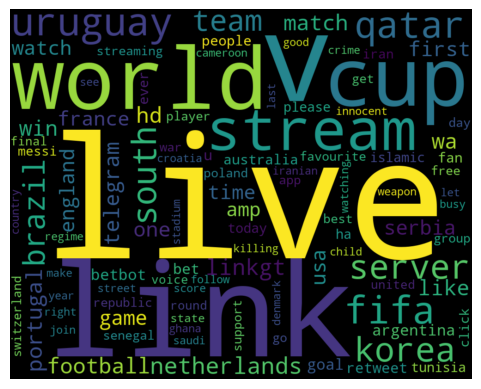

In [19]:
# Plotting wordcloud of a clean text from a preprocessed tweets data
plot_wordcloud(tweets_clean.text_clean_stopwords)

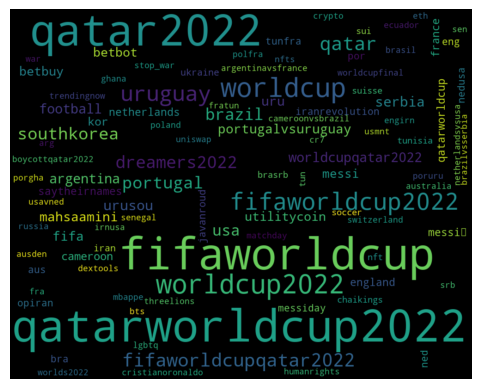

In [20]:
# Plotting wordcloud of a hashtag list from a preprocessed tweets data
plot_wordcloud(tweets_clean.hashtags_list)

In [21]:
# Obtaining tweets created by users with a followers count and the verified status
tweets_fl = tweets_clean[tweets_clean.author_id.isin(users_fl.id)]
tweets_vf = tweets_clean[tweets_clean.author_id.isin(users_vf.id)]

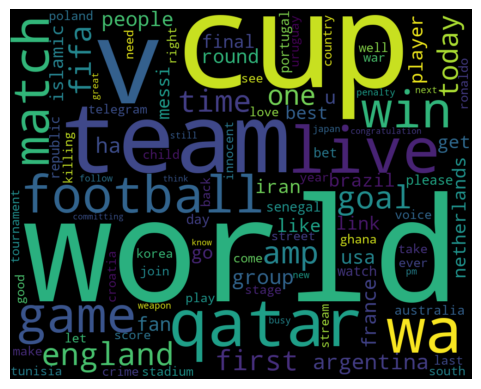

In [22]:
# Plotting wordcloud of a clean text from tweets created by users with a followers count
plot_wordcloud(tweets_fl.text_clean_stopwords)

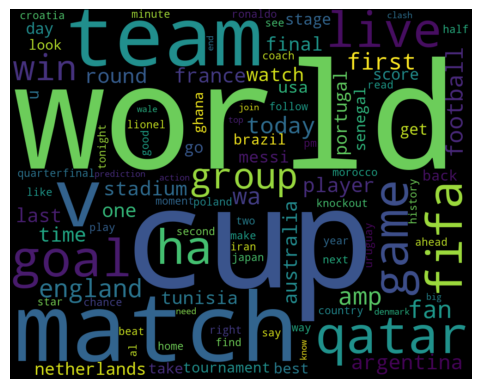

In [23]:
# Plotting wordcloud of a clean text from tweets created by users with the verified status
plot_wordcloud(tweets_vf.text_clean_stopwords)